<a href="https://colab.research.google.com/github/walidba/DS-Portfolio/blob/master/Customers_Segmentation/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Customer Segmentation Project**
Customer Segmentation is one the most important applications of unsupervised learning. With the help of clustering techniques, **B2C** (Business to customers) companies can identify the several segments of customers that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.This will allow them to target the potential user base. 

\- In this Data Science Project, we will perform one of the most essential applications of machine learning – Customer Segmentation. In this project, we will implement customer segmentation in python. Whenever you need to find your best customer, customer segmentation is the ideal methodology.


#### **1. Exploratory data analysis**

We will start our customer segmentation project by exploring the data. Our data consists of one .csv file containing the following features that describe each customer:
* CustomerIDs. 
* Age.
* Gender.
*Annual Income.
*Spending Score.

Let's begin by importing the necessary packages and loading our data.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers_df = pd.read_csv('../content/Mall_Customers.csv')

\- We will display the first five rows of our dataset using the head() function and use the describe() function to output a statistical summary of it

In [3]:
customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


\- We need to dig down more to get better insights from the data. In order to do that we will next perform a univariate analysis on each feature of the dataset.
* **Gender :**

\- In this, we will create a barplot and a piechart to show the gender distribution across our customers dataset.

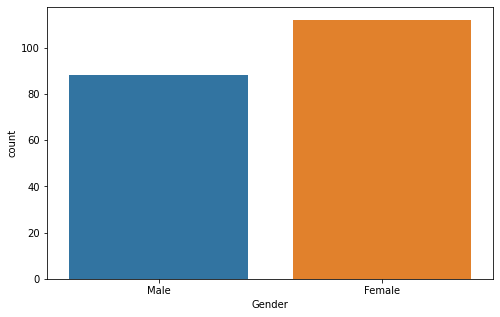

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=customers_df)
plt.show()

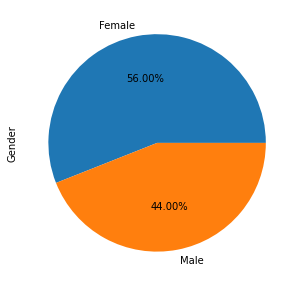

In [6]:
plt.figure(figsize=(8,5))
customers_df.Gender.value_counts().plot.pie( autopct='%.2f%%')
plt.show()

\- From the above graph, we conclude that the percentage of female is 56%, whereas the percentage of male in our customer dataset is 44%.

* **Age :**

\- Next, we analyse the age feature, it's a continuous variable, thus we will plot a histogram to view the distribution of customer ages. We will first proceed by taking summary of the this variable.

In [7]:
customers_df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

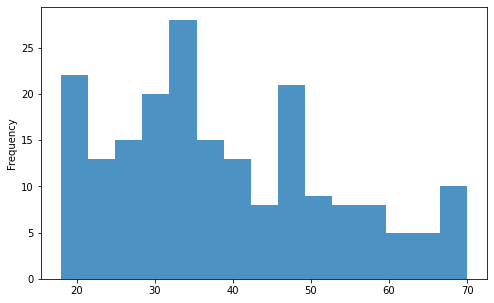

In [8]:
plt.figure(figsize=(8,5))
customers_df.Age.plot.hist(bins=15,alpha=.8)
plt.show()

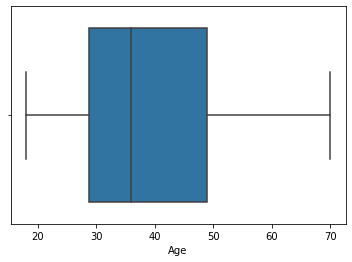

In [9]:
sns.boxplot(x='Age',data=customers_df)

From the above graphs, we can obviously conclude that most of the customers have an age between 30 and 35, also the minimum age of customers is 18, whereas the maximum age is 70.

* **Annual Income**

Now we will explore the annual income feature using a histogram and a density plots to get insights from this feature.


In [10]:
customers_df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

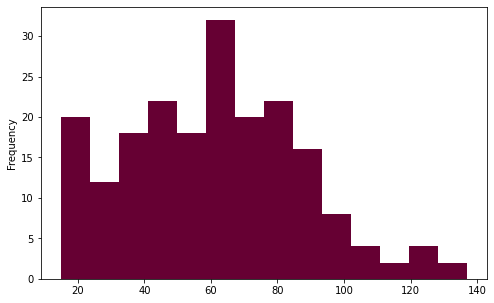

In [11]:
plt.figure(figsize=(8,5))
customers_df['Annual Income (k$)'].plot.hist(bins=14,color="#660033")
plt.show()

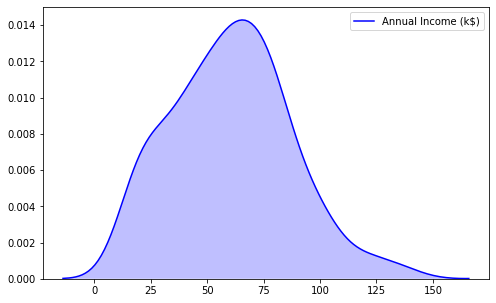

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(customers_df['Annual Income (k$)'], color="blue", shade=True)
plt.show()

\- From the above graphs, we can obviously see that the minimum annual income of the customers is 15 while the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average income of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

* **Spending Score :**

In the same way, we will analyse the spending score feature.

In [13]:
customers_df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

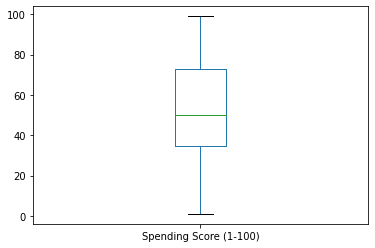

In [14]:
customers_df['Spending Score (1-100)'].plot.box()
plt.show()

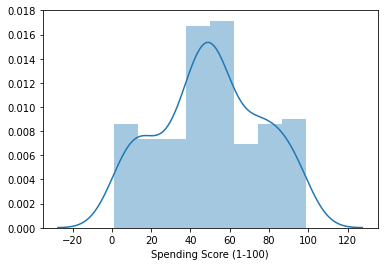

In [15]:
sns.distplot(customers_df['Spending Score (1-100)'])
plt.show()

\- The minimum spending score is 1 while the maximum is 99 and the average is 50.20. From the distribution plot, we can conclude that class of customers having a spending score between 40 and 50 have the highest frequency among all classes.

#### **2. K-means clustering**
After exploring each feature of our dataset, now it's time to segment the customers based on their features. In order to do that, we will use k-means clustering. This algorithm starts by selecting k objects from dataset randomly that will serve as the initial centers for our clusters  known as centroids. Then at each step, the algorithm seek to minimize the intra distance which is the distance between individuals within each cluste and maximize the inter-distance which is the distance between clusters.

* **Determining Optimal number of Clusters:**

While working with clusters, we need to specify the number of clusters to use. Thus we need to find the optimal number of clusters, to do that we will use the Silhouette method.
 * **Average Silhouette Method:**

 With the help of the average silhouette method, we can measure the quality of our clustering operation. With this, we can determine how well within the cluster is the data object. If we obtain a high average silhouette width, it means that we have good clustering. The average silhouette method calculates the mean of silhouette observations for different k values. With the optimal number of k clusters, one can maximize the average silhouette over significant values for k clusters.
 


In [16]:
customers_df['Gender'] = customers_df.Gender.map({'Male':1,'Female':0})

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743008
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 7 The average silhouette_score is : 0.43946743327036053
For n_clusters = 8 The average silhouette_score is : 0.43249096868827536
For n_clusters = 9 The average silhouette_score is : 0.3801528290281677
For n_clusters = 10 The average silhouette_score is : 0.3853426412732716


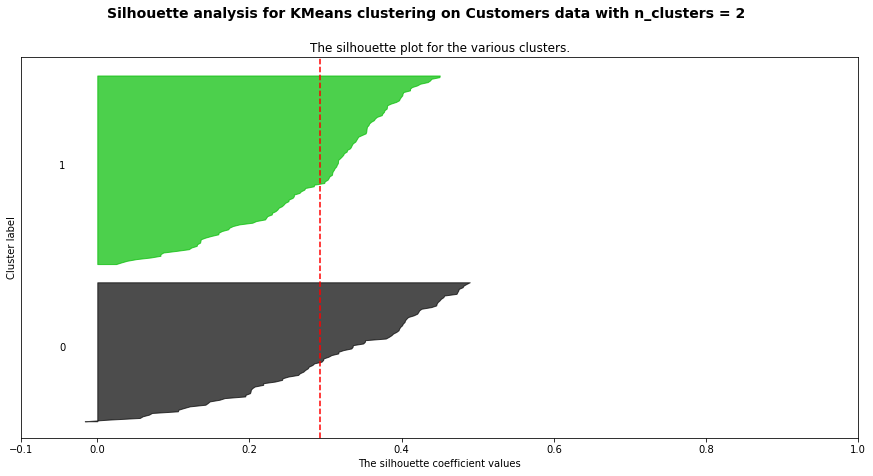

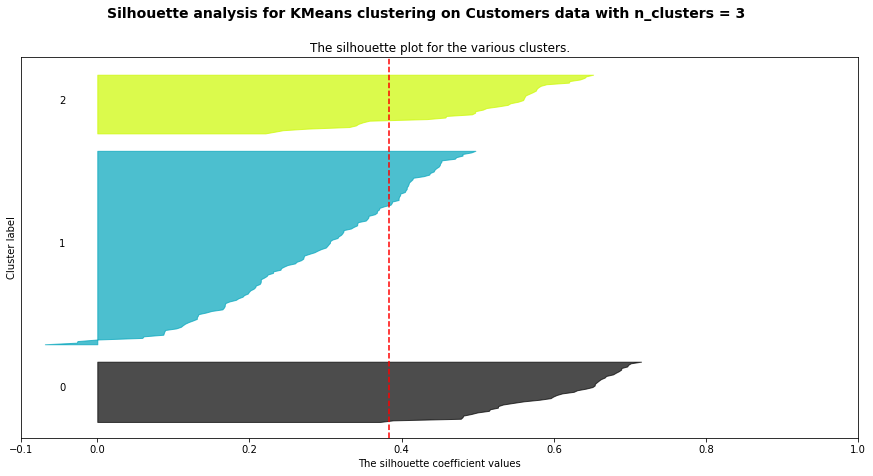

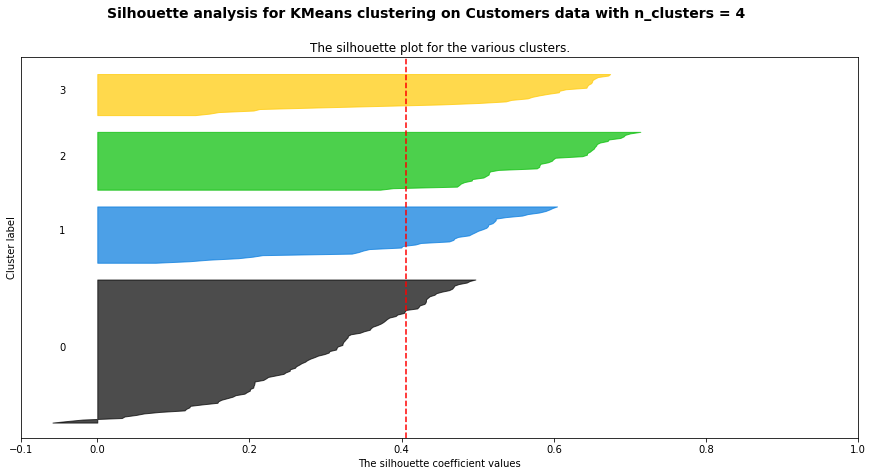

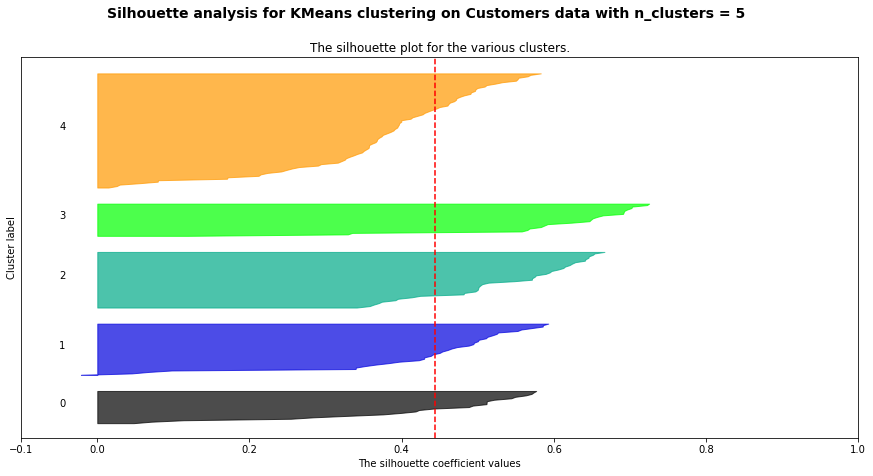

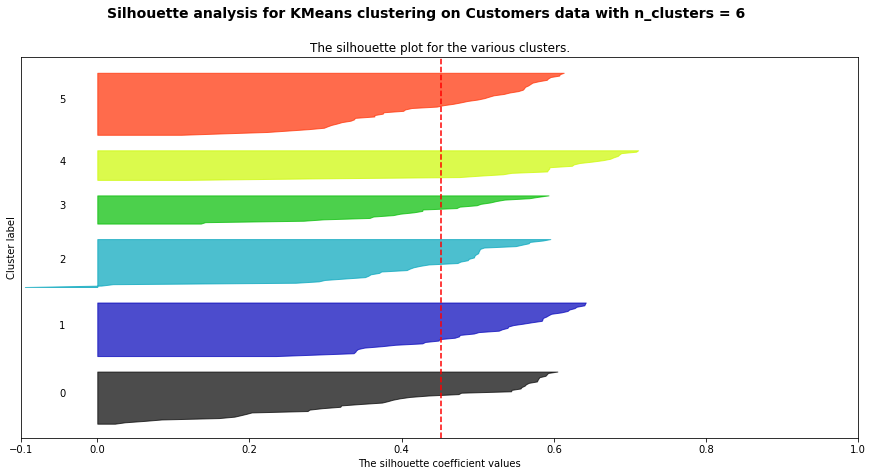

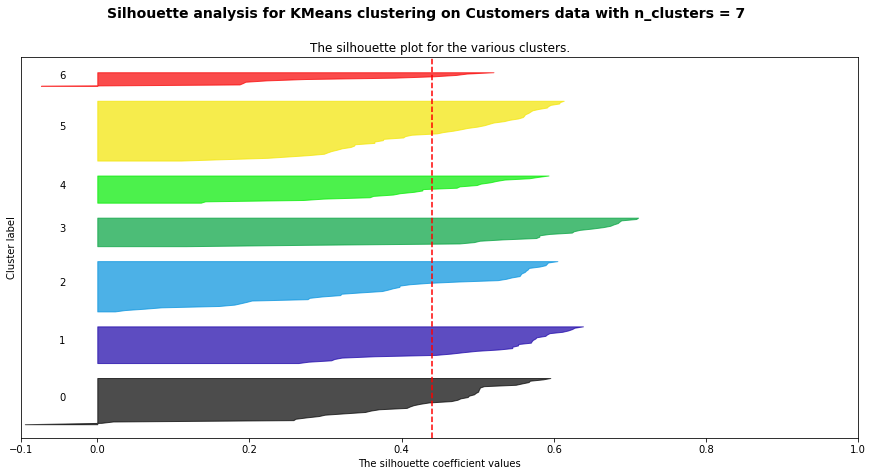

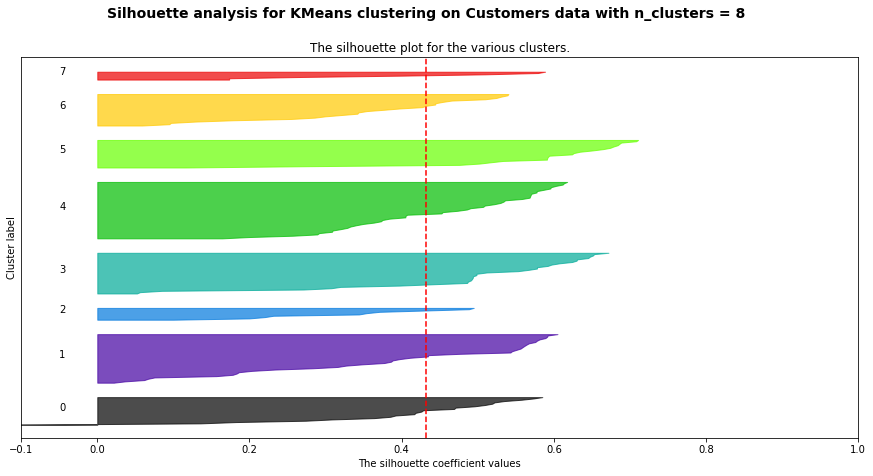

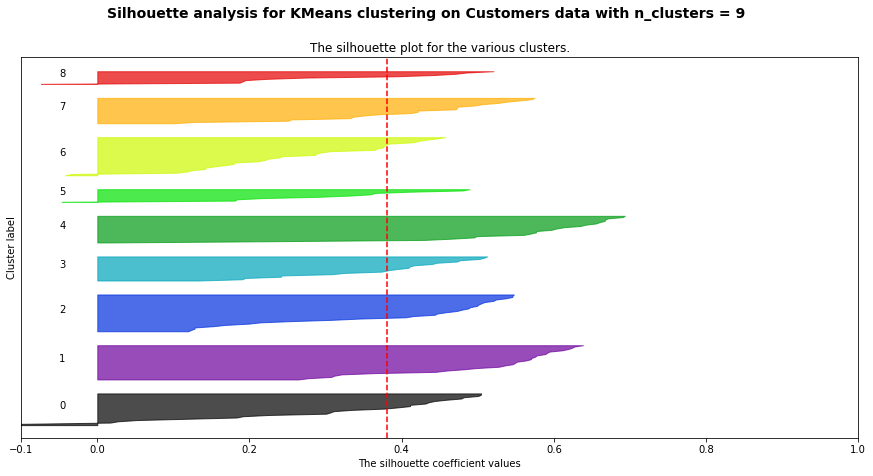

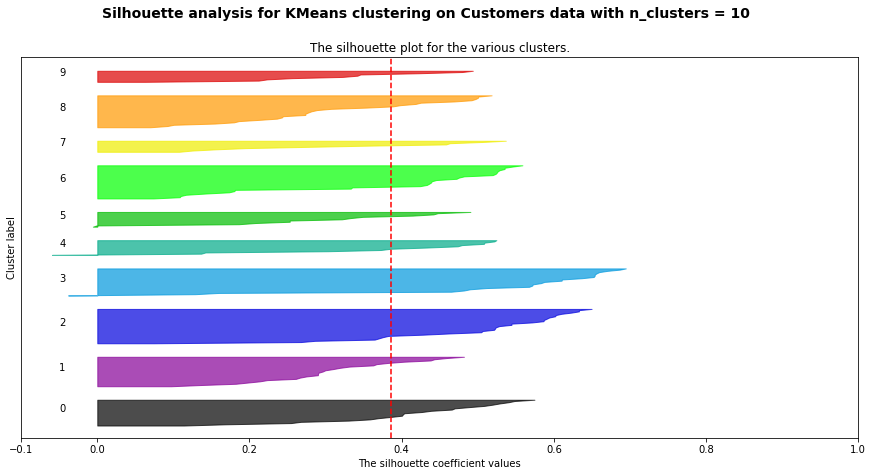

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

l=[]
X = customers_df.iloc[:,1:]
for n_clusters in range(2,11):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(15, 7)


    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    l.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

    plt.suptitle(("Silhouette analysis for KMeans clustering on Customers data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


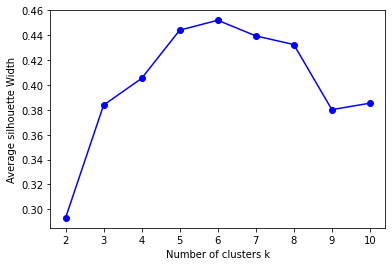

In [18]:
clusters = list(range(2,11))
plt.plot(clusters,l,'-bo')
axes = plt.axes()
axes.set_xlabel("Number of clusters k")
axes.set_ylabel("Average silhouette Width")
plt.show()

\- As we can see from the figure above, the optimal number of clusters k for our customers segmentation task is 6 with an average silhouette width of 0.45.

#### **3. Visualizing the Clustering Results using the PCA with 2 components:**


In [23]:
from sklearn.decomposition import PCA
reduced = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(init='k-means++', n_clusters=6, random_state=10)
kmeans.fit(reduced)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [29]:
pca_df = pd.DataFrame(reduced,columns=['Component1','Component2'])
pca_df['Segment'] = kmeans.labels_
pca_df.head(10)

,Component1,Component2,Segment
0,-31.869945,-33.001252,1
1,0.764494,-56.842901,4
2,-57.408276,-13.124961,1
3,-2.168543,-53.478590,4
4,-32.174085,-30.388412,1
5,-2.176952,-52.227269,4
6,-59.065690,-9.543763,1
7,12.370862,-61.618021,4
8,-66.315769,-3.214232,1
9,-5.655562,-47.267222,4


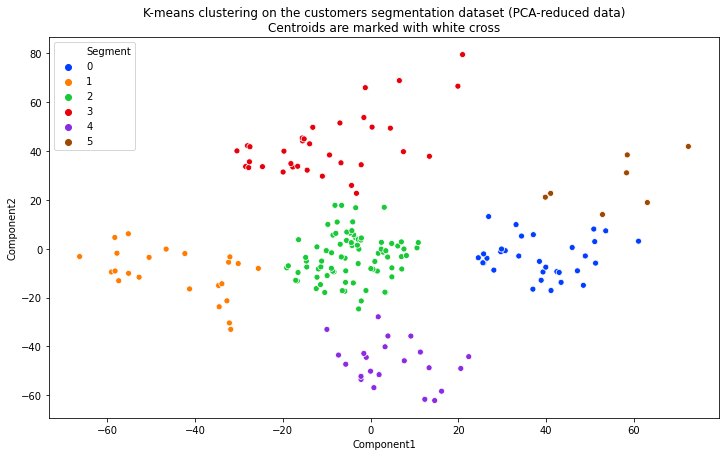

In [37]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Component1',y='Component2',data=pca_df,hue='Segment',palette='bright')
plt.title('K-means clustering on the customers segmentation dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.legend()
plt.show()


  \- **Cluster 0 and 5** – The two cluster consists of  customers with medium PCA2 and a high PCA1.

  \- **Cluster 1** – This cluster represents customers having a high PCA2 and a low PCA1.

  \- **Cluster 2** - This cluster consists of customers with medium PCA1 and medium PCA2 score.

  \- **Cluster 3** – This comprises of customers with a high PCA2 and a medium annual spend of income.

  \- **Cluster 4** – In this cluster, there are customers with a medium PCA1 and a low PCA2 score.

  








\- With the help of clustering, we can understand the variables much better, prompting us to take careful decisions. With the identification of customers, companies can release products and services that target customers based on several parameters like income, age, spending patterns, etc. Furthermore, more complex patterns like product reviews are taken into consideration for better segmentation.